## <font color='Purple'>Fill Rate Calculation for last 30 days</font>

In [71]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
booking = pd.read_csv("C://walks_data//Janus_Booking.csv")

In [4]:
pd.options.display.max_columns = 999

In [5]:
booking_event = pd.DataFrame(booking[booking.Event.notnull()])

In [6]:
booking_event["Booking Datetime"] = pd.to_datetime(booking_event["Booking Datetime"])

In [7]:
booking_event["Booking_Datetime"] = booking_event["Booking Datetime"].dt.date

In [8]:
booking_event["Booking_Datetime"] = pd.to_datetime(booking_event["Booking_Datetime"])

In [9]:
booking_event["Event Datetime"] = pd.to_datetime(booking_event["Event Datetime"])

In [10]:
booking_event['day_of_week'] = booking_event['Booking_Datetime'].dt.weekday_name

In [11]:
booking_event['Total_pax'] = booking_event['Pax Adult'] + booking_event['Pax Children'] + booking_event['Pax Infants'] + booking_event['Pax Seniors'] + booking_event['Pax Students']  

In [12]:
booking_event.head()

,Agent Email,Amount Exchange,Amount Local,Amount USD,Booking Datetime,Booking Id,City,Client City,Client Email,Client Id,Client State,Currency Exchange,Currency Local,Distributor,Event Datetime,Event Id,Event,Group or Private,Number of Records,Ops Domain,Pax Adult,Pax Children,Pax Infants,Pax Seniors,Pax Students,Promo Code,Stage Group,Stage Id,Booking_Datetime,day_of_week,Total_pax
0,NaN,NaN,NaN,NaN,2015-10-04 18:25:16,156173,Vatican,Cane Ridge,jbuckner@gmail.com,117397.0,TN,NaN,NaN,Direct,2016-01-02 07:35:00,7.0,Vatican - Pristine Sistine,Group,1,Italy,2.0,0,0,0,0,NaN,1.0,1000007160102073500,2015-10-04,Sunday,2.0
1,NaN,128.86,178.0,195.75,2015-11-21 16:34:15,158340,Vatican,London,mci_1985@hotmail.com,118716.0,London,EUR,EUR,Direct,2016-01-02 07:35:00,7.0,Vatican - Pristine Sistine,Group,1,Italy,2.0,0,0,0,0,NaN,1.0,1000007160102073500,2015-11-21,Saturday,2.0
2,NaN,189.33,173.0,189.33,2015-11-29 11:34:41,158545,Vatican,Founders View South,gerhard@hcppumps.co.za,118821.0,Gauteng,EUR,EUR,Direct,2016-01-02 07:35:00,7.0,Vatican - Pristine Sistine,Group,1,Italy,1.0,0,0,0,1,NaN,1.0,1000007160102073500,2015-11-29,Sunday,2.0
3,NaN,199.38,178.0,199.38,2015-12-17 07:13:24,159260,Vatican,Richland,kellyreneehoward@gmail.com,119172.0,Washington,EUR,EUR,Direct,2016-01-02 07:35:00,7.0,Vatican - Pristine Sistine,Group,1,Italy,2.0,0,0,0,0,NaN,1.0,1000007160102073500,2015-12-17,Thursday,2.0
4,NaN,178.00,178.0,199.66,2015-12-20 16:57:48,159356,Vatican,Austin,anoopiyer@gmail.com,119236.0,TX,EUR,EUR,Direct,2016-01-02 07:35:00,7.0,Vatican - Pristine Sistine,Group,1,Italy,2.0,0,0,0,0,NaN,1.0,1000007160102073500,2015-12-20,Sunday,2.0


In [13]:
from datetime import datetime, timedelta

## <font color='Cream'>Fill_Rate Function to automate the process of calculation for every instance</font>

In [14]:
def fill_rate_calculator_30_day():
    days = 30
    EvENT_Name = []
    EvENT_date_time = []
    Last_10_Days_Pax_sum = []
    Before_10_days_Pax_sum = []
    Total_pax = []
    Fill_rate = []
    event_selection = [event for event in booking_event.Event.unique()]
    for s in event_selection:
        selection_of_event = booking_event[booking_event.Event == s].copy()
        selection_of_event["Booking_Datetime"] = pd.to_datetime(selection_of_event["Booking_Datetime"])
        selection_of_event["Event Datetime"] = pd.to_datetime(selection_of_event["Event Datetime"])
        event_time = [eventime for eventime in selection_of_event['Event Datetime'].unique()]
        for t in event_time:
            selection_of_event_time = selection_of_event[selection_of_event['Event Datetime'] == t].copy()
            uni_time = selection_of_event_time["Event Datetime"].unique()
            EvENT_Name.append(uni_time[0])
            uni_event = selection_of_event_time.Event.unique()
            EvENT_date_time.append(uni_event[0])
            selection_of_event_time.Total_pax.sum()
            last_day = selection_of_event_time["Booking_Datetime"].dt.date.iloc[-1]
            cutoff_date = last_day - pd.Timedelta(days=days)
            rng = pd.date_range(cutoff_date, last_day)
            selection_of_event_time_df1 = selection_of_event_time[selection_of_event_time["Booking_Datetime"].isin(rng)]
            Last_10_Days_Pax_sum.append(selection_of_event_time_df1.Total_pax.sum())
            Before_10_days_Pax_sum.append(selection_of_event_time.Total_pax.sum() - selection_of_event_time_df1.Total_pax.sum())
            Total_pax.append(selection_of_event_time.Total_pax.sum())
            Fill_rate.append(selection_of_event_time_df1.Total_pax.sum() / selection_of_event_time.Total_pax.sum())
    return pd.DataFrame(list(zip(EvENT_Name, EvENT_date_time, Last_10_Days_Pax_sum, Before_10_days_Pax_sum, Fill_rate, Total_pax)))

In [16]:
df = fill_rate_calculator_30_day()

In [17]:
df.to_excel("C://walks_data//fill_rate_30_day.xlsx")

## IT ends here

## <font color='Orange'>Fill Rate Analysis for 10 Days period</font>

BY Filtering 70% fill Rate. 

In [19]:
fill_10_df = pd.read_excel("C://walks_data//fill_rate.xlsx")

In [20]:
fill_10_df.head()

,Event_DateTime,Event_name,Last_10_Days_Pax_sum,Before_10_days_Pax_sum,Total_Pax,Fill_rate,Fill_rate_Percentage
0,2016-01-02 07:35:00,Vatican - Pristine Sistine,16,6,22,0.727273,72.727273
1,2016-01-04 07:35:00,Vatican - Pristine Sistine,9,12,21,0.428571,42.857143
2,2016-01-05 07:35:00,Vatican - Pristine Sistine,9,12,21,0.428571,42.857143
3,2016-01-07 07:35:00,Vatican - Pristine Sistine,2,10,12,0.166667,16.666667
4,2016-01-08 07:35:00,Vatican - Pristine Sistine,6,9,15,0.400000,40.000000


In [63]:
fill_10_df.count()

Event_DateTime            22216
Event_name                22216
Last_10_Days_Pax_sum      22216
Before_10_days_Pax_sum    22216
Total_Pax                 22216
Fill_rate                 22216
Fill_rate_Percentage      22216
dtype: int64

## <font color='Grey'>Info about DataFrame, There are 22216 records for fill rate for last 10 days</font>

In [56]:
fill_10_df.describe()

,Last_10_Days_Pax_sum,Before_10_days_Pax_sum,Total_Pax,Fill_rate,Fill_rate_Percentage
count,22216.000000,22216.000000,22216.000000,22216.000000,22216.000000
mean,7.210209,9.771156,16.981365,0.565717,56.571739
std,6.928659,13.295821,17.660780,0.306250,30.624998
min,1.000000,0.000000,1.000000,0.013699,1.369863
25%,2.000000,0.000000,5.000000,0.320000,32.000000
50%,5.000000,6.000000,12.000000,0.500000,50.000000
75%,9.000000,14.000000,23.000000,1.000000,100.000000
max,116.000000,158.000000,174.000000,1.000000,100.000000


## <font color='Orange'>Fill Rate Above 70 %</font>

In [22]:
fill_70_df = pd.DataFrame(fill_10_df[fill_10_df.Fill_rate_Percentage >= 70])

## <font color='Orange'>Fill Rate Above 70% and Total_Pax Above 10 </font>

In [29]:
fill_7010_df = pd.DataFrame(fill_10_df[(fill_10_df.Fill_rate_Percentage >= 70) & (fill_10_df.Total_Pax >=10)])

In [30]:
fill_7010_df.head()

,Event_DateTime,Event_name,Last_10_Days_Pax_sum,Before_10_days_Pax_sum,Total_Pax,Fill_rate,Fill_rate_Percentage
0,2016-01-02 07:35:00,Vatican - Pristine Sistine,16,6,22,0.727273,72.727273
41,2016-03-05 07:30:00,Vatican - Pristine Sistine,8,2,10,0.800000,80.000000
61,2016-03-25 07:35:00,Vatican - Pristine Sistine,12,0,12,1.000000,100.000000
78,2016-04-08 07:35:00,Vatican - Pristine Sistine,17,0,17,1.000000,100.000000
115,2016-05-13 07:35:00,Vatican - Pristine Sistine,12,0,12,1.000000,100.000000


## <font color='Orange'>Fill Rate Above 70% and in Year 2017 </font>

In [50]:
Fill_rate_above_70_2017 = pd.DataFrame(fill_7010_df[fill_7010_df.Event_DateTime > '2017-01-01'])

### <font color='Fluorescent Blue'>Fill Rate Above 70% and in Year 2017 and Last 10 days pax size above 20 </font>

In [57]:
Fill_rate_above_70_2017_20 = pd.DataFrame(Fill_rate_above_70_2017[Fill_rate_above_70_2017.Last_10_Days_Pax_sum > 20])

In [58]:
Fill_rate_above_70_2017_20.head()

,Event_DateTime,Event_name,Last_10_Days_Pax_sum,Before_10_days_Pax_sum,Total_Pax,Fill_rate,Fill_rate_Percentage
487,2017-07-12 07:30:00,Vatican - Pristine Sistine,29,5,34,0.852941,85.294118
1132,2017-05-02 13:45:00,Florence - Best of Florence,22,5,27,0.814815,81.481481
1145,2017-05-16 13:45:00,Florence - Best of Florence,23,7,30,0.766667,76.666667
1172,2017-06-09 13:45:00,Florence - Best of Florence,34,11,45,0.755556,75.555556
1187,2017-06-21 13:45:00,Florence - Best of Florence,21,8,29,0.724138,72.413793


In [62]:
Fill_rate_above_70_2017_20.count()

Event_DateTime            168
Event_name                168
Last_10_Days_Pax_sum      168
Before_10_days_Pax_sum    168
Total_Pax                 168
Fill_rate                 168
Fill_rate_Percentage      168
dtype: int64

### <font color='Fiery Rose'>For Example Event_name is selected "Florence - Best of Florence" </font> and let see the table

In [66]:
Fill_rate_above_70_2017_20_Florence = pd.DataFrame(Fill_rate_above_70_2017_20[Fill_rate_above_70_2017_20.Event_name == "Florence - Best of Florence"])

In [67]:
Fill_rate_above_70_2017_20_Florence

,Event_DateTime,Event_name,Last_10_Days_Pax_sum,Before_10_days_Pax_sum,Total_Pax,Fill_rate,Fill_rate_Percentage
1132,2017-05-02 13:45:00,Florence - Best of Florence,22,5,27,0.814815,81.481481
1145,2017-05-16 13:45:00,Florence - Best of Florence,23,7,30,0.766667,76.666667
1172,2017-06-09 13:45:00,Florence - Best of Florence,34,11,45,0.755556,75.555556
1187,2017-06-21 13:45:00,Florence - Best of Florence,21,8,29,0.724138,72.413793
1195,2017-06-29 08:30:00,Florence - Best of Florence,32,13,45,0.711111,71.111111
1206,2017-07-08 08:30:00,Florence - Best of Florence,28,12,40,0.700000,70.000000
1239,2017-08-03 08:30:00,Florence - Best of Florence,21,8,29,0.724138,72.413793
1244,2017-08-09 13:45:00,Florence - Best of Florence,22,7,29,0.758621,75.862069
1253,2017-08-20 13:45:00,Florence - Best of Florence,25,7,32,0.781250,78.125000
1281,2017-09-14 13:45:00,Florence - Best of Florence,21,8,29,0.724138,72.413793


## <font color='Dogwood Rose'>Bar_Chart for above table Distribution</font>

In [69]:
Florence_distribution_higher = pd.DataFrame(Fill_rate_above_70_2017_20_Florence[["Event_DateTime", "Last_10_Days_Pax_sum"]])

In [73]:
Florence_distribution_higher["Event_DateTime"] = pd.to_datetime(Florence_distribution_higher["Event_DateTime"])
Florence_distribution_higher = Florence_distribution_higher.set_index("Event_DateTime")

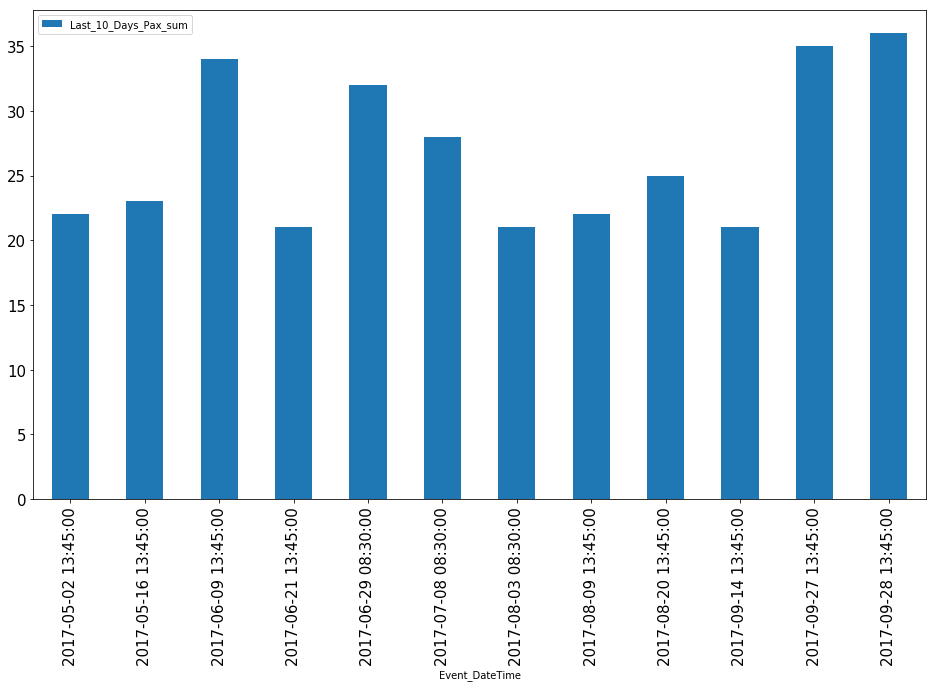

In [80]:
Florence_distribution_higher.plot(kind='bar', figsize=(16,9), fontsize = 15)

## <font color='Blue'>Overview for above 70 % fill rate in terms of min, max, std, 25%, 50%, 70% description</font>

In [32]:
fill_7010_df.describe()

,Last_10_Days_Pax_sum,Before_10_days_Pax_sum,Total_Pax,Fill_rate,Fill_rate_Percentage
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,14.978286,2.495429,17.473714,0.863967,86.396717
std,7.798754,2.742781,9.038457,0.111769,11.176855
min,7.000000,0.000000,10.000000,0.700000,70.000000
25%,10.000000,0.000000,12.000000,0.760000,76.000000
50%,13.000000,2.000000,15.000000,0.833333,83.333333
75%,18.000000,4.000000,22.000000,1.000000,100.000000
max,116.000000,25.000000,116.000000,1.000000,100.000000


In [35]:
fill_7010_df.Event_name.unique()

array(['Vatican - Pristine Sistine', 'Florence - Best of Florence',
       'Rome - Food Tour', 'Rome - VIP Colosseum Underground',
       'Rome - Premium Colosseum', 'Vatican - Vatican Highlights',
       'Venice - Legendary Venice', 'Rome - Crypts & Catacombs',
       'Florence - Uffizi Gallery ', 'Rome - Driving Tour',
       'Rome - Welcome to Rome ', 'Statue of Liberty Tour',
       'Vatican - Complete Vatican', 'Vatican - Major Basilicas',
       'World Trade Center Tour with 9/11 Memorial Museum Tickets',
       'World Trade Center Tour with Pre-Reserved One World Observatory Tickets',
       'Rome - Rome in a day ', 'Venice - Welcome to Venice',
       'Rome - EF COOKING CLASS',
       'Authentic Italian Greenwich Village Food Tour & Tastings',
       'Transfer Rome - Airport Transfer (Up to 8 Pax)',
       'Exclusive Disney on Broadway Tour: Behind the Magic at the New Amsterdam Theatre',
       'Rome - VIP Caesars Palace', 'CUSTOM TOUR - HD Rome',
       'Rome - Borghese Galle

In [37]:
fill_7010_df[fill_7010_df.Event_name == 'Vatican - Pristine Sistine'].count() 

Event_DateTime            21
Event_name                21
Last_10_Days_Pax_sum      21
Before_10_days_Pax_sum    21
Total_Pax                 21
Fill_rate                 21
Fill_rate_Percentage      21
dtype: int64

In [38]:
fill_7010_df[fill_7010_df.Event_name == 'Florence - Best of Florence'].count() 

Event_DateTime            56
Event_name                56
Last_10_Days_Pax_sum      56
Before_10_days_Pax_sum    56
Total_Pax                 56
Fill_rate                 56
Fill_rate_Percentage      56
dtype: int64

In [39]:
fill_7010_df[fill_7010_df.Event_name == 'Rome - Food Tour'].count() 

Event_DateTime            18
Event_name                18
Last_10_Days_Pax_sum      18
Before_10_days_Pax_sum    18
Total_Pax                 18
Fill_rate                 18
Fill_rate_Percentage      18
dtype: int64

## <font color='Green'>Fill Rate below 21% and Last 10 days pax size below 10</font>

In [54]:
fill_less_df = pd.DataFrame(fill_10_df[(fill_10_df.Fill_rate_Percentage < 21) & (fill_10_df.Last_10_Days_Pax_sum < 10)])

In [55]:
fill_less_df

,Event_DateTime,Event_name,Last_10_Days_Pax_sum,Before_10_days_Pax_sum,Total_Pax,Fill_rate,Fill_rate_Percentage
3,2016-01-07 07:35:00,Vatican - Pristine Sistine,2,10,12,0.166667,16.666667
7,2016-01-12 07:35:00,Vatican - Pristine Sistine,2,9,11,0.181818,18.181818
10,2016-01-16 07:35:00,Vatican - Pristine Sistine,2,12,14,0.142857,14.285714
12,2016-01-19 07:35:00,Vatican - Pristine Sistine,1,7,8,0.125000,12.500000
17,2016-01-26 07:35:00,Vatican - Pristine Sistine,2,9,11,0.181818,18.181818
18,2016-01-28 07:35:00,Vatican - Pristine Sistine,1,4,5,0.200000,20.000000
44,2016-03-08 07:30:00,Vatican - Pristine Sistine,2,17,19,0.105263,10.526316
48,2016-03-12 07:30:00,Vatican - Pristine Sistine,3,15,18,0.166667,16.666667
49,2016-03-12 08:00:00,Vatican - Pristine Sistine,2,8,10,0.200000,20.000000
52,2016-03-15 07:30:00,Vatican - Pristine Sistine,4,25,29,0.137931,13.793103


In [42]:
fill_10_df[fill_10_df.Fill_rate_Percentage < 20]

,Event_DateTime,Event_name,Last_10_Days_Pax_sum,Before_10_days_Pax_sum,Total_Pax,Fill_rate,Fill_rate_Percentage
3,2016-01-07 07:35:00,Vatican - Pristine Sistine,2,10,12,0.166667,16.666667
7,2016-01-12 07:35:00,Vatican - Pristine Sistine,2,9,11,0.181818,18.181818
10,2016-01-16 07:35:00,Vatican - Pristine Sistine,2,12,14,0.142857,14.285714
12,2016-01-19 07:35:00,Vatican - Pristine Sistine,1,7,8,0.125000,12.500000
17,2016-01-26 07:35:00,Vatican - Pristine Sistine,2,9,11,0.181818,18.181818
44,2016-03-08 07:30:00,Vatican - Pristine Sistine,2,17,19,0.105263,10.526316
48,2016-03-12 07:30:00,Vatican - Pristine Sistine,3,15,18,0.166667,16.666667
52,2016-03-15 07:30:00,Vatican - Pristine Sistine,4,25,29,0.137931,13.793103
60,2016-03-25 07:30:00,Vatican - Pristine Sistine,5,55,60,0.083333,8.333333
63,2016-03-26 08:00:00,Vatican - Pristine Sistine,2,21,23,0.086957,8.695652
